<a href="https://colab.research.google.com/github/tamandua01/61600Datascience/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente del Dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"

# Ver contenido del directorio
print("Estructura del dataset:")
for root, dirs, files in os.walk(dataset_path):
    print(root, "->", len(files), "archivos")


Estructura del dataset:
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2 -> 0 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray -> 0 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val -> 0 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/NORMAL -> 8 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/PNEUMONIA -> 8 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test -> 0 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/NORMAL -> 234 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/PNEUMONIA -> 390 archivos
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneum

In [ ]:
base_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

print("Ruta de entrenamiento:", train_dir)
print("Ruta de test:", test_dir)
print("Ruta de validación:", val_dir)


Ruta de entrenamiento: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train
Ruta de test: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test
Ruta de validación: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizar los valores de los píxeles
datagen = ImageDataGenerator(rescale=1./255)

# Generadores de datos
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ajustar tamaño si es necesario
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


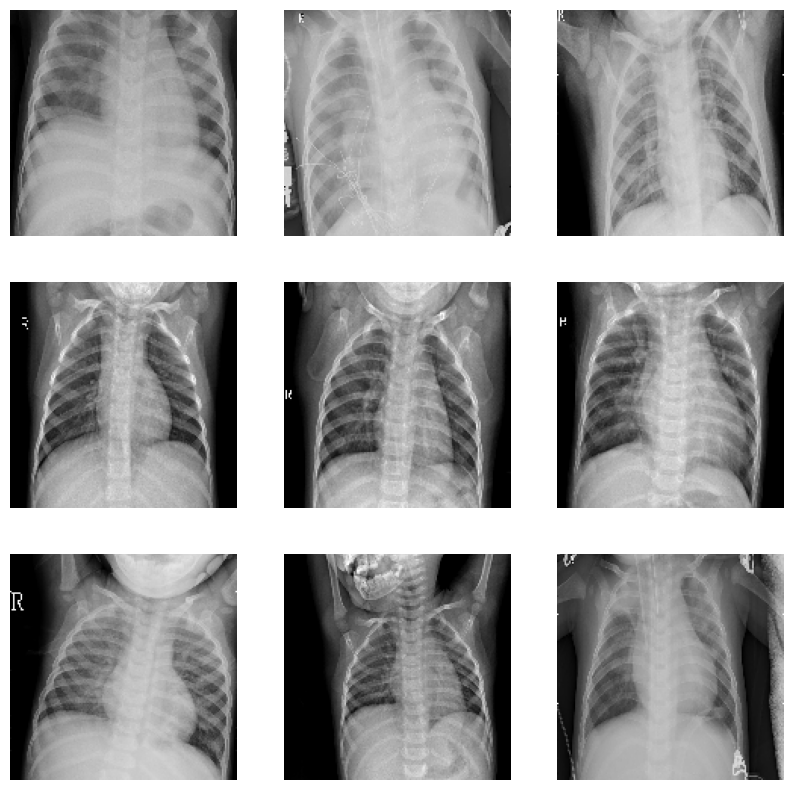

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener una muestra del generador de entrenamiento
x_batch, y_batch = next(train_generator)

# Mostrar las primeras 9 imágenes
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])
    ax.axis("off")
plt.show()


In [ ]:
def contar_imagenes(directorio):
    clases = ["NORMAL", "PNEUMONIA"]
    for clase in clases:
        cantidad = len(os.listdir(os.path.join(directorio, clase)))
        print(f"{clase}: {cantidad} imágenes")

print("\n📊 Train set:")
contar_imagenes(train_dir)

print("\n📊 Validation set:")
contar_imagenes(val_dir)

print("\n📊 Test set:")
contar_imagenes(test_dir)



📊 Train set:
NORMAL: 1341 imágenes
PNEUMONIA: 3875 imágenes

📊 Validation set:
NORMAL: 8 imágenes
PNEUMONIA: 8 imágenes

📊 Test set:
NORMAL: 234 imágenes
PNEUMONIA: 390 imágenes


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
# Directorio base
base_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# Definir rutas de entrenamiento, validación y prueba
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


In [ ]:
# Generadores de imágenes con normalización
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Crear los generadores
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                     target_size=(150, 150),
                                                     batch_size=32,
                                                     class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(150, 150),
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


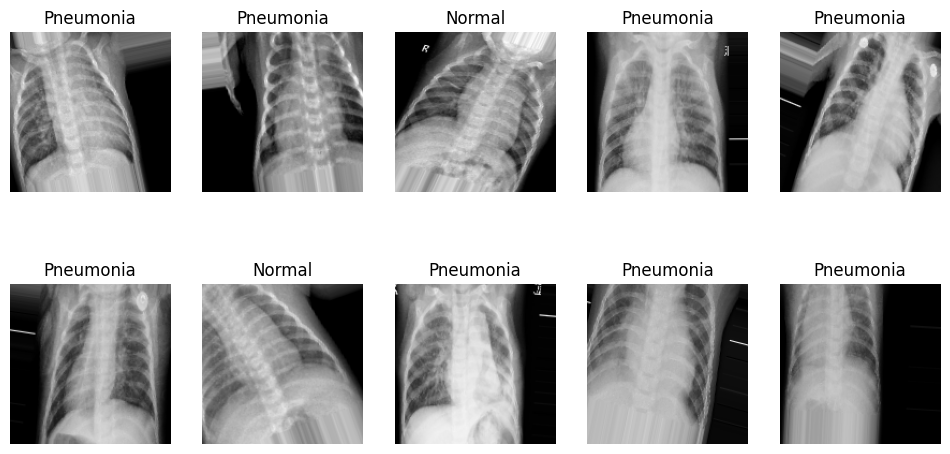

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener un lote de imágenes del generador de entrenamiento
x_batch, y_batch = next(train_generator)

# Mostrar 10 imágenes con sus etiquetas
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_batch[i])
    axes[i].set_title("Pneumonia" if y_batch[i] == 1 else "Normal")
    axes[i].axis("off")

plt.show()


Train - NORMAL: 1341, PNEUMONIA: 3875


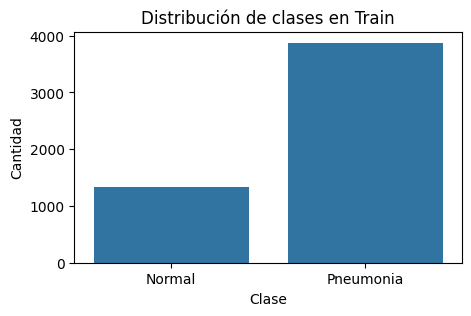

Validation - NORMAL: 8, PNEUMONIA: 8


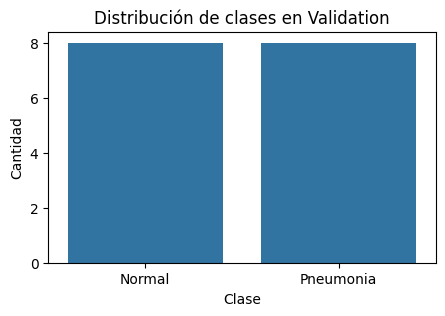

Test - NORMAL: 234, PNEUMONIA: 390


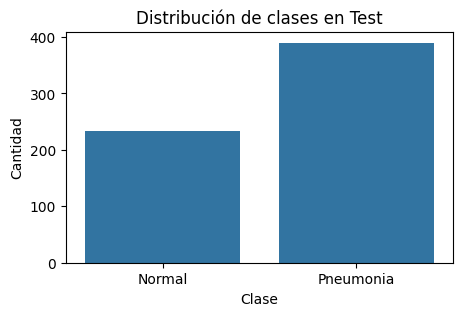

In [ ]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Definir la ruta base del dataset
base_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# Corregir los nombres de las carpetas
class_counts = {
    "Train": "train",
    "Validation": "val",
    "Test": "test"
}

for key, folder_name in class_counts.items():
    normal_path = os.path.join(base_dir, folder_name, "NORMAL")
    pneumonia_path = os.path.join(base_dir, folder_name, "PNEUMONIA")

    # Contar archivos si la carpeta existe
    normal_count = len(os.listdir(normal_path)) if os.path.exists(normal_path) else 0
    pneumonia_count = len(os.listdir(pneumonia_path)) if os.path.exists(pneumonia_path) else 0

    print(f"{key} - NORMAL: {normal_count}, PNEUMONIA: {pneumonia_count}")

    # Crear un dataframe para graficar
    df = pd.DataFrame({"Clase": ["Normal", "Pneumonia"], "Cantidad": [normal_count, pneumonia_count]})

    # Graficar
    plt.figure(figsize=(5, 3))
    sns.barplot(x="Clase", y="Cantidad", data=df)
    plt.title(f"Distribución de clases en {key}")
    plt.show()



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir tamaños de imágenes y batch
img_size = (150, 150)  # O puedes probar con (224, 224) si usas redes preentrenadas
batch_size = 32

# Generador de imágenes para normalización y aumentación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_val_datagen = ImageDataGenerator(rescale=1.0/255)

# Cargar imágenes desde las carpetas
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  # No queremos mezclar en test para evaluación
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

# Crear el modelo secuencial
model = models.Sequential()

# Primera capa convolucional con max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Entrada 150x150x3
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional con max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar para la capa densa
model.add(layers.Flatten())

# Capa densa
model.add(layers.Dense(512, activation='relu'))

# Capa de salida
model.add(layers.Dense(1, activation='sigmoid'))  # Salida binaria (PNEUMONIA o NORMAL)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Número de pasos por época
    epochs=10,  # Cambia el número de épocas según sea necesario
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size  # Validación en cada época
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.7390 - loss: 0.5734 - val_accuracy: 0.8750 - val_loss: 0.6252
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.8520 - loss: 0.3245 - val_accuracy: 0.7500 - val_loss: 0.6187
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8909 - loss: 0.2632 - val_accuracy: 0.7500 - val_loss: 0.7795
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9085 - loss: 0.2275 - val_accuracy: 0.9375 - val_loss: 0.3963
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9078 - loss: 0.2279 - val_accuracy: 0.8125 - val_loss: 0.5601
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9069 - loss: 0.2177 - val_accuracy: 0.5000 - val_loss: 1.7666
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9030 - loss: 0.2373 - val_accuracy: 0.8750 - val_loss: 0.3775
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9071 - loss: 0.2158 - val_accu

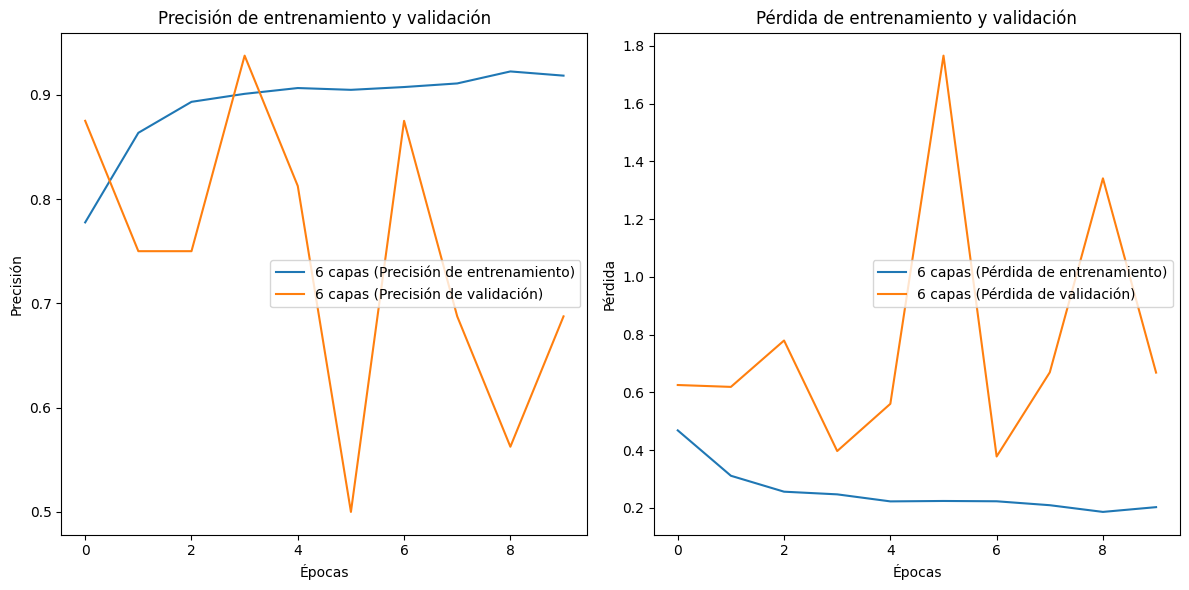

In [34]:
history_6_layers= history

# Graficar la precisión de ambos modelos
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history_6_layers.history['accuracy'], label='6 capas (Precisión de entrenamiento)')
plt.plot(history_6_layers.history['val_accuracy'], label='6 capas (Precisión de validación)')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida de ambos modelos
plt.subplot(1, 2, 2)
plt.plot(history_6_layers.history['loss'], label='6 capas (Pérdida de entrenamiento)')
plt.plot(history_6_layers.history['val_loss'], label='6 capas (Pérdida de validación)')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [36]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir el tamaño de las imágenes y el batch size
img_size = (150, 150)  # Tamaño de las imágenes
batch_size = 32

# Rutas a los directorios de datos (asegúrate de que estas rutas sean correctas)
base_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"  # Cambia esto a la ruta correcta

# Generador de imágenes para entrenamiento (incluye aumento de datos)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización de las imágenes
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generador para validación y prueba (solo normalización)
test_val_datagen = ImageDataGenerator(rescale=1.0/255)

# Cargar las imágenes desde las carpetas de entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  # No queremos mezclar en test para evaluación
)

# Definir el modelo con 2 capas convolucionales
model_2_layers = Sequential()

# Primera capa convolucional
model_2_layers.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_2_layers.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model_2_layers.add(Conv2D(64, (3, 3), activation='relu'))
model_2_layers.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar la salida de las capas convolucionales
model_2_layers.add(Flatten())

# Capa densa de salida
model_2_layers.add(Dense(1, activation='sigmoid'))  # Usamos 'sigmoid' para clasificación binaria

# Compilar el modelo
model_2_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_2_layers.summary()

# Entrenar el modelo
history_2_layers = model_2_layers.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_2_layers.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          82,945 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,337 (399.75 KB)

 Trainable params: 102,337 (399.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7298 - loss: 0.5570 - val_accuracy: 0.6250 - val_loss: 0.7422
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8506 - loss: 0.3306 - val_accuracy: 0.6250 - val_loss: 1.0288
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.8675 - loss: 0.3153 - val_accuracy: 0.6875 - val_loss: 0.5156
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8662 - loss: 0.3120 - val_accuracy: 0.6875 - val_loss: 0.7269
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.8870 - loss: 0.2613 - val_accuracy: 0.6875 - val_loss: 0.6027
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8739 - loss: 0.2799 - val_accuracy: 0.6875 - val_loss: 0.6579
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9003 - loss: 0.2465 - val_accuracy: 0.8125 - val_loss: 0.4053
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8962 - loss: 0.2561 - val_accu

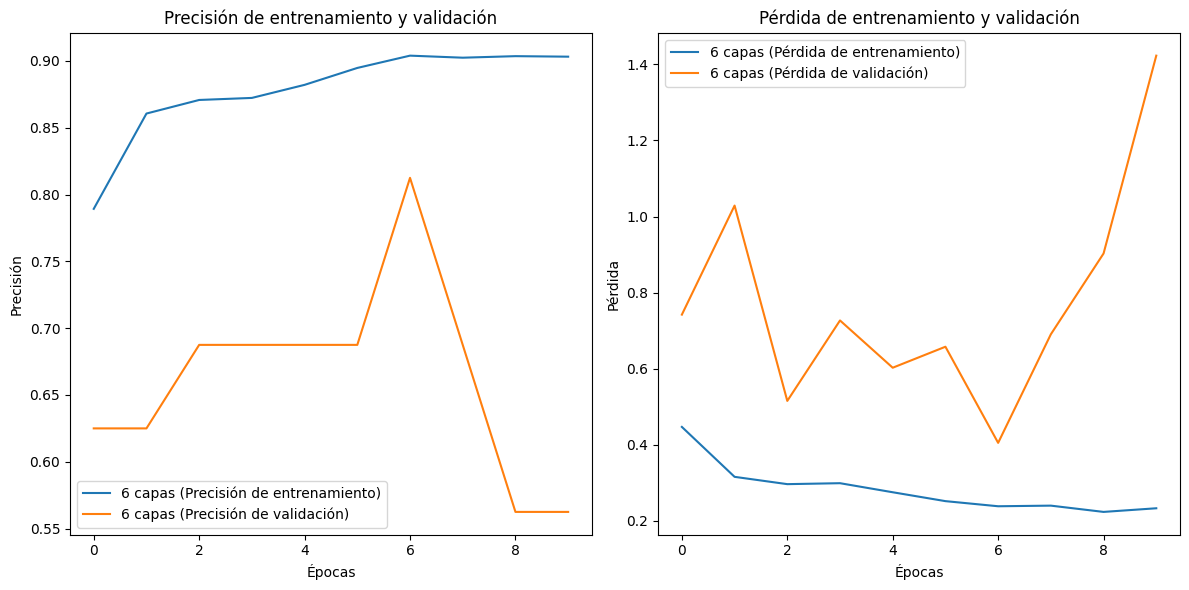

In [37]:
# Graficar la precisión de ambos modelos
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history_2_layers.history['accuracy'], label='6 capas (Precisión de entrenamiento)')
plt.plot(history_2_layers.history['val_accuracy'], label='6 capas (Precisión de validación)')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida de ambos modelos
plt.subplot(1, 2, 2)
plt.plot(history_2_layers.history['loss'], label='6 capas (Pérdida de entrenamiento)')
plt.plot(history_2_layers.history['val_loss'], label='6 capas (Pérdida de validación)')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [38]:
# Comparación de precisión en conjunto de prueba
test_loss, test_accuracy = model_2_layers.evaluate(test_generator)
print(f'Precisión en test: {test_accuracy*100:.2f}%')
print(f'Pérdida en test: {test_loss:.4f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - accuracy: 0.4926 - loss: 1.3159
Precisión en test: 73.40%
Pérdida en test: 0.7198


In [43]:
test_loss_6, test_accuracy_6 = model.evaluate(test_generator)
print(f'Modelo 6 capas - Precisión en test: {test_accuracy_6*100:.2f}%')
print(f'Modelo 6 capas - Pérdida en test: {test_loss_6:.4f}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 588ms/step - accuracy: 0.6508 - loss: 0.7569
Modelo 6 capas - Precisión en test: 80.29%
Modelo 6 capas - Pérdida en test: 0.4545


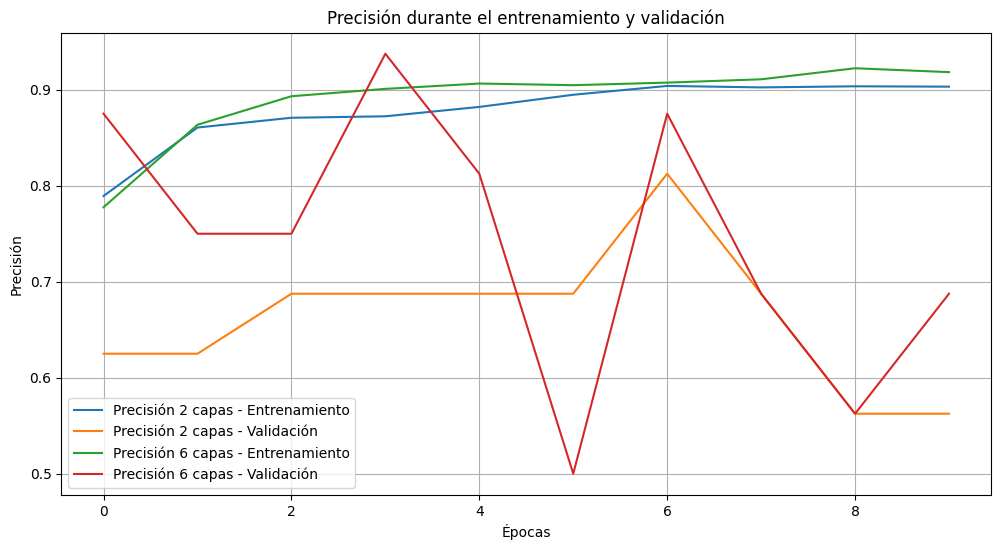

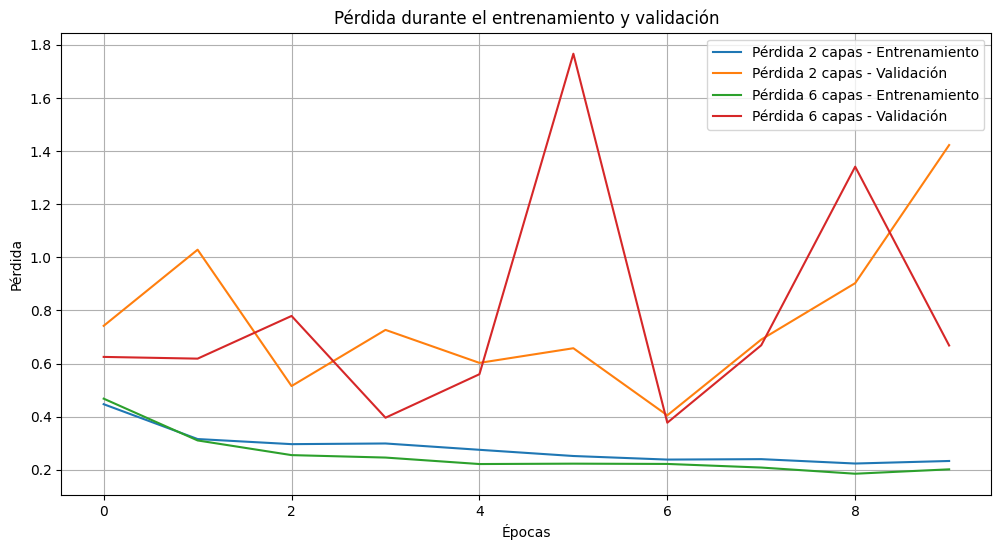

In [41]:
import matplotlib.pyplot as plt

# Graficar precisión para ambos modelos
plt.figure(figsize=(12, 6))
plt.plot(history_2_layers.history['accuracy'], label='Precisión 2 capas - Entrenamiento')
plt.plot(history_2_layers.history['val_accuracy'], label='Precisión 2 capas - Validación')
plt.plot(history_6_layers.history['accuracy'], label='Precisión 6 capas - Entrenamiento')
plt.plot(history_6_layers.history['val_accuracy'], label='Precisión 6 capas - Validación')
plt.title('Precisión durante el entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Graficar pérdida para ambos modelos
plt.figure(figsize=(12, 6))
plt.plot(history_2_layers.history['loss'], label='Pérdida 2 capas - Entrenamiento')
plt.plot(history_2_layers.history['val_loss'], label='Pérdida 2 capas - Validación')
plt.plot(history_6_layers.history['loss'], label='Pérdida 6 capas - Entrenamiento')
plt.plot(history_6_layers.history['val_loss'], label='Pérdida 6 capas - Validación')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()
